**Importing the relevant packages**

In [56]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The first part of this problem is to create a function that can solve the model, ie. give the optimal labor supply and consumption given the parameters.
We can first define the parameters given. Then we will create a function that takes these parameters as inputs, as well as an initial guess.
The output is then the utility multiplied by -1 (since we are using a minimizer function).

We can now create the function that minimizes the output from the previous function, using the optimize-minimize function.

An important thing to note is, that because the utility is monotonically increasing in the consumption, then $c^*=x$. This means that it is enough to just find the optimal labor supply, and then insert this in the equation for x to find the optimal consumption. 

In [72]:
#Defining the parameters
w=1
m=1
nu=10
epsilon = 0.3
tau0=0.4
tau1=0.1
kappa=0.4

#Creating function that calculates the utility (multiplied by -1)
def function(l,w,m,nu,epsilon,tau0,tau1, kappa):

    c = m+w*l-tau0*w*l-tau1*np.fmax(w*l-kappa,0)  #c was just equal to x
    
    utility = np.log(c)-nu*l**(1+1/epsilon)/(1+1/epsilon) #defining the utility function
    return -utility #returning the utility multiplied by -1 so we can minimize


#Creating function that calculates optimal labor supply and consumption
def opt_values(w=w,m=m,nu=nu,epsilon=epsilon,tau0=tau0,tau1=tau1, kappa=kappa):
    solution = optimize.minimize_scalar(function,args = (w,m,nu,epsilon,tau0,tau1,kappa),bounds=(0,1),method='Bounded') 
    l_opt=solution.x
    c_opt = m+w*l_opt-tau0*w*l_opt-tau1*np.fmax(w*l_opt-kappa,0) #the optimal c was just a function of l_opt
    
    return l_opt,c_opt #returning the optimal labor supply and optimal consumption

# Question 2

Next we would like to plot the optimal labor supply and optimal consumption as a function of the wage. 

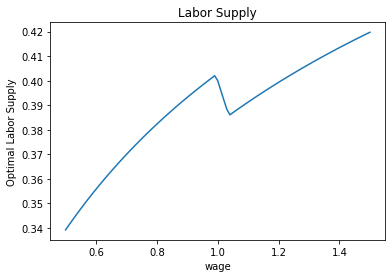

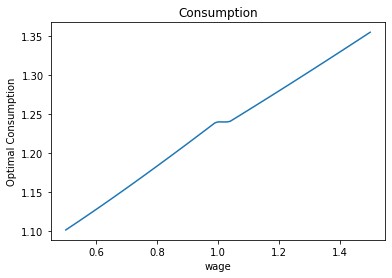

In [73]:
x=np.linspace(0.5,1.5,101) #creating vector with values from 0.5 to 1.5 
l_vec= []  #creating empty vector
c_vec= []  #creating empty vector 

#looping through different values of the wage to get the optimal l and c
for i in x:
    l_vec.append(opt_values(w=i)[0])  #filling in the numbers in the matrix
    c_vec.append(opt_values(w=i)[1])


#Plotting wage against labor supply
plt.plot(x,l_vec)
plt.xlabel("wage")
plt.ylabel("Optimal Labor Supply")
plt.title("Labor Supply")
plt.show()

#Plotting wage against consumption
plt.plot(x,c_vec)
plt.xlabel("wage")
plt.ylabel("Optimal Consumption")
plt.title("Consumption")
plt.show()


The first graph shows that the choice of labour supply depends positively on the offered wage. This implies that the substitution effect is larger than the income effect. The second graph shows that consumption depends positively on the wage as well. As the higher wage does not make you work equivalently less, there is an income increase. With a marginal propensity to consume at between 0 and 1, this will in turn increase consumption. The humps around w=1 are counter intuitive and probably due to a programming error.

# Question 3

After creating the function to solve the problem, we will now simulate the model to get some results.
Assumes that we have a population of 10.000 people.
The wage for each individual is uniformly distributed between 0.5 and 1.5.
The goal now is to calculate the total tax revenue, which is given by
$$T=\sum_{1=1}^{10000}\tau_0w_i*l_i^*+\tau_1*max(w_i*l_i^*-\kappa,0)$$

In [71]:
np.random.seed(111)
W = np.random.uniform(size=10000,low=0.5,high=1.5) #simulating wages for all individuals

matrix = np.zeros((10000,2)) #creating matrix of zero-values

#looping through all wages of each individual to find the optimal labor supply and consumption for each individual
for i in range(0,10000):
    matrix[i-1]=opt_values(w=W[i]) #filling in the values in the matrix
    
c_opt = matrix[:,1]
l_opt = matrix[:,0]


Total_tax_revenue=np.sum(tau0*W*l_opt+tau1*np.fmax(W*l_opt-kappa,0)) #implementing the formula for the total tax revenue

print("Total tax revenue is "+ str(Total_tax_revenue)) #The result

Total tax revenue is 1606.7415942875878


# Question 4

So, in our simulation, the total tax revenue was estimated to 1606. What would happen, if we in stead changed the Frisch elasticity from 0.3 to 0.1? 

In [67]:
#Doing the same as before, but setting epsilon=0.1
matrix = np.zeros((10000,2))

for i in range(0,10000):
    matrix[i]=opt_values(w=W[i],epsilon=0.1)
    
c_opt = matrix[:,1]
l_opt = matrix[:,0]


Total_tax_revenue=np.sum(tau0*W*l_opt+tau1*np.fmax(W*l_opt-kappa,0))

print("Total tax revenue is "+ str(Total_tax_revenue))

Total tax revenue is 3210.385270421445


The result shows that a lower Frisch-elasticity will increase the total tax revenue. This is consistent with economic theory, as the Frisch-elasticity measures the degree to which a labourer will let his labour supply decisions be influenced by the disposable wage. A high elasticity means that a wage increase will lead to a much larger labour supply, but thus it also means that a disposable wage decrease from a tax increase will heavily reduce the labour supply. As we are reducing the Frish-elasticity from 0.3 to 0.1, this will make the labourer react less to the tax, and work relatively more than with a higher elasticity. The result of this is a larger tax revenue, because of a smaller dead weight loss.

# Question 5

Lastly, we are now interested in finding the choice og tax levels and cut off for the upper tax bracket such that the total tax revenue is maximized.

In other words, we want to find a $\tau_0,\tau_1,\kappa$ such that $T$ is maximized. 

In [69]:
# code
np.random.seed(111)
#Simulating 10 individuals, more individuals require a run time that is far too long
W_small = np.random.uniform(size=10,low=0.5,high=1.5) 

#Creating function that returns the total tax revenue multiplied by -1
def tax_calculater(guesses):
    tau0 = guesses[0]
    tau1 = guesses[1]
    kappa = guesses[2]
    
    if tau0 <0 or tau1 <0 or kappa <0 or tau0+tau1>1:
        tax = -np.inf
    else:
        matrix = np.zeros((10,2))
        for i in range(0,10):
            matrix[i]=opt_values(w=W_small[i],tau0=tau0,kappa=kappa,tau1=tau1)
        l_opt= matrix[:,0]
        tax = np.sum(tau0*W_small*l_opt+tau1*np.fmax(W_small*l_opt-kappa,0))
    return -tax


#Finding the optimal choice of tau0, tau1 and kappa
solution = optimize.minimize(tax_calculater,np.array([0.4,0.1,0.4]),method='Nelder-Mead')
t0_opt= solution.x[0]
t1_opt= solution.x[1]
kappa_opt= solution.x[2]

Tot_tax= np.sum(t0_opt*W*l_opt+t1_opt*np.fmax(W*l_opt-kappa_opt,0))
print("The optimal tau0 is "+ str(t0_opt))
print("The optimal tau1 is "+ str(t1_opt))
print("The optimal kappa is "+ str(kappa_opt))
print("The total tax revenue is "+str(Tot_tax))

The optimal tau0 is 0.7826249909965691
The optimal tau1 is 3.3185592335340336e-08
The optimal kappa is 0.19969808985504203
The total tax revenue is 5648.285580028192


# Conclusion

The results show that the optimal income tax is 78 percent, while it is essentially 0 above the top-tax cutoff. This will maximize the tax revenue to 